# Block Release

This notebook contains the skeleton of the code to be used for the tasks.

## Imports

In [50]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


## Locations

In [4]:
# coordinates are latitude, longitude pairs
LOCATION_UNIVERSITY_PARK = (52.93726647677705, -1.1959384006396074)
LOCATION_JUBILEE_CAMPUS = (52.95232635429298, -1.1862643609249397)
LOCATION_NOTTINGHAM_CITY_CENTRE = (52.953, -1.149)

## API

You will need to add more API URLs here as needed to complete the stories.

In [5]:
API_STREET_CRIME = "https://data.police.uk/api/crimes-street/"

## Crimes Near University Park Campus

Example function which calculates the number of crimes within 1 mile of University Park campus.

In [1]:
def count_crimes_within_1_mile(
    lat: float, lon: float, year: int, month: int
) -> int:
    """Calculate number of crimes within 1 mile of a location for a date.

    Args:
        lat (float): Latitude of the location.
        lon (float): Longitude of the location.
        year (int): Year to find crimes.
        month (int): Month of the provided year to find crimes.

    Returns:
        int: Count of the crimes
    """
    url = (
        API_STREET_CRIME + f"all-crime?lat={lat}&lng={lon}&date={year}-{month}"
    )
    response = requests.get(url)
    if response.status_code == 200:
        return len(response.json())
    else:
        print(f"Error retrieving data: {response.status_code}")


print(count_crimes_within_1_mile(*LOCATION_UNIVERSITY_PARK, 2023, 1))

NameError: name 'LOCATION_UNIVERSITY_PARK' is not defined

In [57]:
def getcrimes(location,year,month):
    lat = location[0]
    lon = location[1]

    url = (
            API_STREET_CRIME + f"all-crime?lat={lat}&lng={lon}&date={year}-{month}"
    )

    response = requests.get(url)
    temp = pd.DataFrame(response.json()).value_counts('category')
    temp.to_frame()
    temp = temp.reset_index()

    figure(figsize=(12, 6), dpi=80)
    plt.xticks(rotation=70)
    return plt.bar(temp['category'],temp[0])


<BarContainer object of 13 artists>

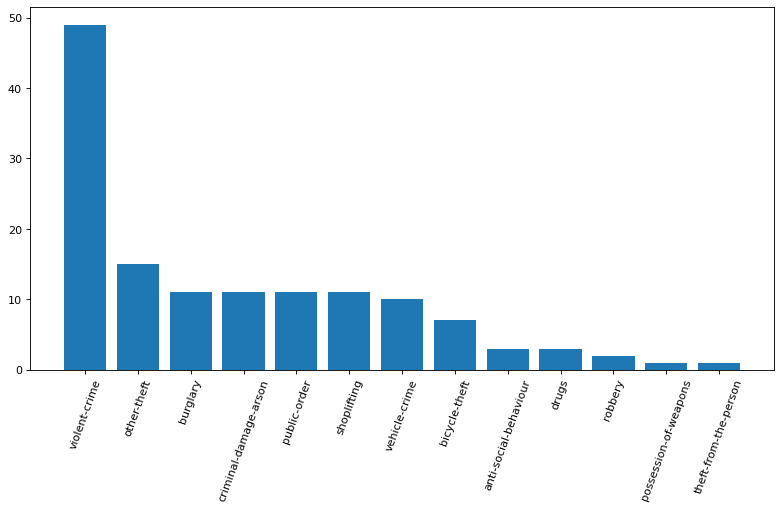

In [58]:
getcrimes(LOCATION_UNIVERSITY_PARK,2023,1)


<BarContainer object of 13 artists>

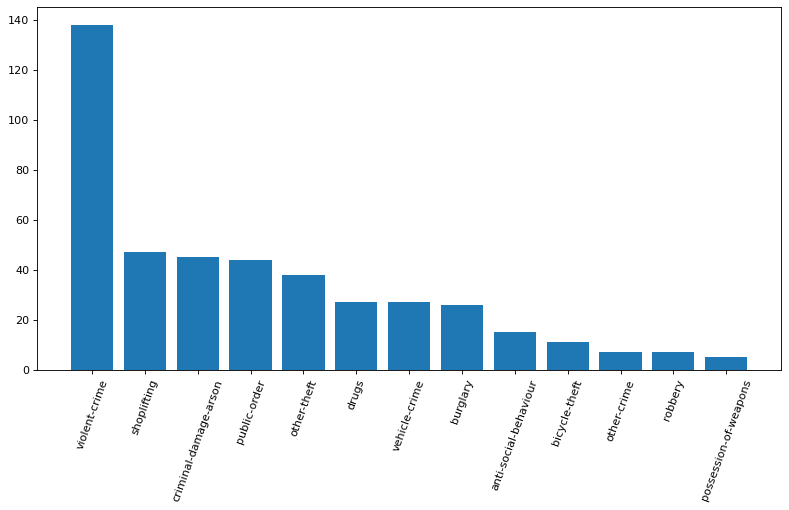

In [59]:
getcrimes(LOCATION_JUBILEE_CAMPUS,2023,1)

<BarContainer object of 14 artists>

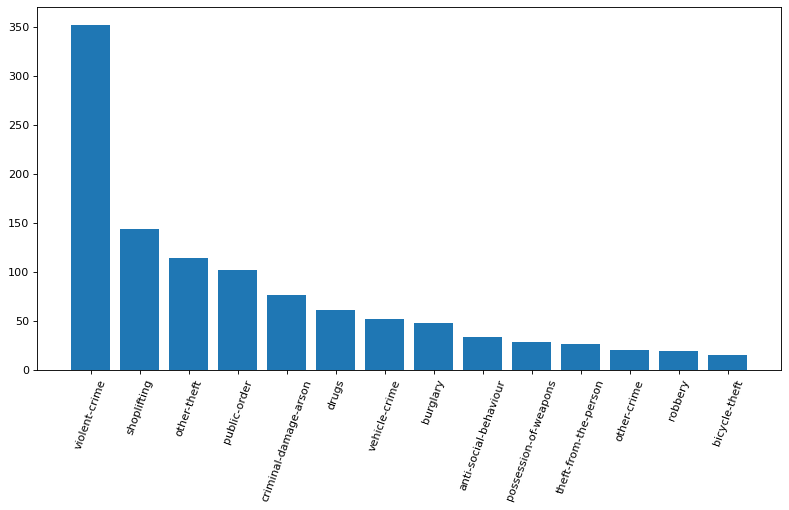

In [60]:
getcrimes(LOCATION_NOTTINGHAM_CITY_CENTRE,2023,1)